In [44]:
#downloading the MNIST dataset using tensrflow
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
nsamples, nx, ny = x_train.shape
train = x_train
test = x_test
train_labels = y_train
test_labels = y_test
train = train.reshape((nsamples,nx*ny))
nsamples, nx, ny = x_test.shape
test = test.reshape((nsamples,nx*ny))

5


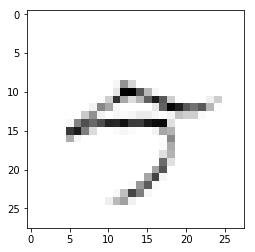

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 778
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [15]:
import numpy as np
from sklearn.linear_model import SGDClassifier
train_labels = (train_labels%2 == 0)
test_labels = (test_labels%2 == 0)

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(train, train_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
from sklearn.metrics import confusion_matrix
y_pred = sgd_clf.predict(test)
cnfm = confusion_matrix(test_labels,y_pred)
print("The confusion matrix for the SGD binary classifier")
print(cnfm)

The confusion matrix for the SGD binary classifier
[[4940  134]
 [2072 2854]]


In [17]:
from sklearn.model_selection import cross_val_score
print("The cross validation score for SGD classifier")
cross_val_score(sgd_clf,train, train_labels, cv=3, scoring="accuracy")

The cross validation score for SGD classifier


array([0.85130743, 0.87975   , 0.85659283])

Prediction result for value 4 to be even is True


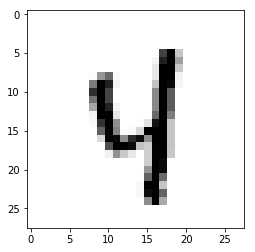

In [77]:
some_digit = train[1006].reshape(1,-1)
print("Prediction result for value " + str(y_train[1006]) + " to be even is " + str(sgd_clf.predict(some_digit)[0]))
plt.imshow(x_train[1006], cmap='Greys')

Prediction result for value 7 to be even is False


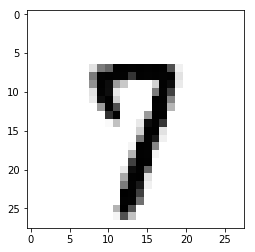

In [75]:
some_digit = train[888].reshape(1,-1)
print("Prediction result for value " + str(y_train[888]) + " to be even is " + str(sgd_clf.predict(some_digit)[0]))
plt.imshow(x_train[888], cmap='Greys')

Prediction result for value 3 to be even is False


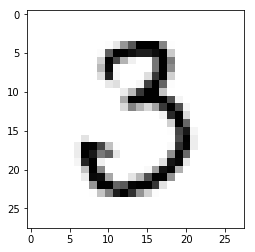

In [74]:
some_digit = train[998].reshape(1,-1)
print("Prediction result for value " + str(y_train[998]) + " to be even is " + str(sgd_clf.predict(some_digit)[0]))
plt.imshow(x_train[998], cmap='Greys')

In [78]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')